# Logistic Regression

nicely explained:
* https://towardsdatascience.com/logistic-regression-python-7c451928efee  

example:
* https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8

__Logistic Regression is a supervised machine learning algorithm used in binary classification__.  
Logistic Regression __fits a line to a dataset and then returns the probability__ that a new sample belongs to one of the two classes according to its location with respect to the line.

### Logistic Regression Assumptions
* Binary logistic regression requires the dependent variable to be binary.
* For a binary regression, the factor level 1 of the dependent variable should represent the desired outcome.
* Only the meaningful variables should be included.
* The independent variables should be independent of each other. That is, the model should have little or no multicollinearity.
* The independent variables are linearly related to the log odds.
* Logistic regression requires quite large sample sizes.

### Difference between probability and odds. 
Odds are calculated by taking the number of events where something happened and dividing by the number events where that same something didn’t happen. For example, if the odds of winning a game are 5 to 2, we calculate the ratio as 5/2=2.5. On the other hand, probability is calculated by taking the number of events where something happened and dividing by the total number events (including events when that same something did and didn’t happen). For example, the probability of winning a game with the same odds is 5/(5+2)=0.714.

The dataset comes from the UCI Machine Learning repository(http://archive.ics.uci.edu/ml/index.php) 

In [1]:
# ! curl -OL https://raw.githubusercontent.com/madmashup/targeted-marketing-predictive-engine/master/banking.csv

In [2]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt 
plt.rc("font", size=14)

import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

The dataset provides the bank customers’ information. It includes 41,188 records and 21 fields.  
It is __related to direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict whether the client will subscribe (1/0) to a term deposit (variable y).__ 

In [4]:
df=pd.read_csv("./banking.csv")
df.shape

(41188, 21)

In [5]:
df.describe()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


In [6]:
df.sample(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
20647,47,technician,divorced,high.school,no,no,no,telephone,may,fri,156,5,999,0,nonexistent,1.1,93.994,-36.4,4.864,5191.0,0
14107,27,student,single,unknown,no,yes,no,cellular,oct,fri,309,2,999,1,failure,-1.1,94.601,-49.5,0.972,4963.6,0
8831,59,retired,married,basic.9y,no,no,no,cellular,aug,mon,105,9,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,0
19748,37,blue-collar,divorced,basic.9y,no,yes,no,telephone,may,thu,604,4,999,0,nonexistent,-1.8,92.893,-46.2,1.266,5099.1,1
5914,47,management,married,basic.4y,unknown,no,no,cellular,nov,wed,57,1,999,0,nonexistent,-0.1,93.200,-42.0,4.120,5195.8,0


In [7]:
df.count()
#df.notnull().sum()

age               41188
job               41188
marital           41188
education         41188
default           41188
housing           41188
loan              41188
contact           41188
month             41188
day_of_week       41188
duration          41188
campaign          41188
pdays             41188
previous          41188
poutcome          41188
emp_var_rate      41188
cons_price_idx    41188
cons_conf_idx     41188
euribor3m         41188
nr_employed       41188
y                 41188
dtype: int64

In [8]:
 df["education"].nunique(),df["education"].unique()

(8, array(['basic.4y', 'unknown', 'university.degree', 'high.school',
        'basic.9y', 'professional.course', 'basic.6y', 'illiterate'],
       dtype=object))

In [9]:
 df["job"].nunique(),df["job"].unique()

(12, array(['blue-collar', 'technician', 'management', 'services', 'retired',
        'admin.', 'housemaid', 'unemployed', 'entrepreneur',
        'self-employed', 'unknown', 'student'], dtype=object))

In [10]:
df.describe(include="all")

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
count,41188.00000,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188.000000,41188.000000,41188.000000,41188.000000,41188,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
unique,NaN,12,4,8,3,3,3,2,10,5,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,admin.,married,university.degree,no,yes,no,cellular,may,thu,NaN,NaN,NaN,NaN,nonexistent,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,10422,24928,12168,32588,21576,33950,26144,13769,8623,NaN,NaN,NaN,NaN,35563,NaN,NaN,NaN,NaN,NaN,NaN
mean,40.02406,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,258.285010,2.567593,962.475454,0.172963,NaN,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,10.42125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,259.279249,2.770014,186.910907,0.494901,NaN,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,17.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,0.000000,0.000000,NaN,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.000000,1.000000,999.000000,0.000000,NaN,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,180.000000,2.000000,999.000000,0.000000,NaN,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,319.000000,3.000000,999.000000,0.000000,NaN,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000


In [11]:
 df["marital"].nunique(),df["marital"].unique()

(4, array(['married', 'single', 'divorced', 'unknown'], dtype=object))

In [12]:
len(df), len(df.dropna())

(41188, 41188)

Input variables
1. age (numeric)
2. job : type of job (categorical: “admin”, “blue-collar”, “entrepreneur”, “housemaid”, “management”, “retired”, “self-employed”, “services”, “student”, “technician”, “unemployed”, “unknown”)
3. marital : marital status (categorical: “divorced”, “married”, “single”, “unknown”)
4. education (categorical: “basic.4y”, “basic.6y”, “basic.9y”, “high.school”, “illiterate”, “professional.course”, “university.degree”, “unknown”)
5. default: has credit in default? (categorical: “no”, “yes”, “unknown”)
6. housing: has housing loan? (categorical: “no”, “yes”, “unknown”)
7. loan: has personal loan? (categorical: “no”, “yes”, “unknown”)
7. contact: contact communication type (categorical: “cellular”, “telephone”)
8. month: last contact month of year (categorical: “jan”, “feb”, “mar”, …, “nov”, “dec”)
9. day_of_week: last contact day of the week (categorical: “mon”, “tue”, “wed”, “thu”, “fri”)
10. duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y=’no’). The duration is not known before a call is performed, also, after the end of the call, y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model
11. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
12. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
13. previous: number of contacts performed before this campaign and for this client (numeric)
14. poutcome: outcome of the previous marketing campaign (categorical: “failure”, “nonexistent”, “success”)
15. emp.var.rate: employment variation rate — (numeric)
16. cons.price.idx: consumer price index — (numeric)
17. cons.conf.idx: consumer confidence index — (numeric)
18. euribor3m: euribor 3 month rate — (numeric)
19. nr.employed: number of employees — (numeric)

__The education column of the dataset has many categories and we need to reduce the categories for a better modelling.__

In [13]:
 df["education"].nunique(),df["education"].unique()

(8, array(['basic.4y', 'unknown', 'university.degree', 'high.school',
        'basic.9y', 'professional.course', 'basic.6y', 'illiterate'],
       dtype=object))

In [14]:
df['education']=np.where(df['education'] =='basic.9y', 'Basic', df['education'])
df['education']=np.where(df['education'] =='basic.6y', 'Basic', df['education'])
df['education']=np.where(df['education'] =='basic.4y', 'Basic', df['education'])

In [15]:
 df["education"].nunique(),df["education"].unique()

(6, array(['Basic', 'unknown', 'university.degree', 'high.school',
        'professional.course', 'illiterate'], dtype=object))

In [16]:
df['education'].value_counts()

Basic                  12513
university.degree      12168
high.school             9515
professional.course     5243
unknown                 1731
illiterate                18
Name: education, dtype: int64

In [17]:
df['y'].value_counts()

0    36548
1     4640
Name: y, dtype: int64

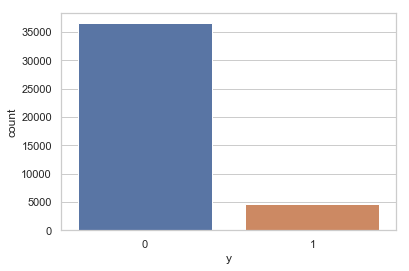

In [18]:
sns.countplot(x='y', data=df)

In [19]:
count_no_sub = len(df[df['y']==0])
count_sub = len(df[df['y']==1])
pct_of_no_sub = count_no_sub/(count_no_sub+count_sub)
print("percentage of no subscription is", pct_of_no_sub*100)
pct_of_sub = count_sub/(count_no_sub+count_sub)
print("percentage of subscription", pct_of_sub*100)

percentage of no subscription is 88.73458288821988
percentage of subscription 11.265417111780131


__Our classes are imbalanced__, and the ratio of no-subscription to subscription instances is 89:11.  
Before we go ahead to balance the classes, let’s do some more exploration.

In [20]:
df.groupby('y').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
y,,,,,,,,,,
0,39.911185,220.844807,2.633085,984.113878,0.132374,0.248875,93.603757,-40.593097,3.811491,5176.166600
1,40.913147,553.191164,2.051724,792.035560,0.492672,-1.233448,93.354386,-39.789784,2.123135,5095.115991


Observations:
* The average age of customers who bought the term deposit is higher than that of the customers who didn’t.
* The pdays (days since the customer was last contacted) is understandably lower for the customers who bought it. The lower the pdays, the better the memory of the last call and hence the better chances of a sale.
* Surprisingly, campaigns (number of contacts or calls made during the current campaign) are lower for customers who bought the term deposit.

#### We can calculate categorical means for other categorical variables such as education and marital status to get a more detailed sense of our data.

In [21]:
df.groupby('job').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
job,,,,,,,,,,,
admin.,38.187296,254.312128,2.623489,954.319229,0.189023,0.015563,93.534054,-40.245433,3.550274,5164.125350,0.129726
blue-collar,39.555760,264.542360,2.558461,985.160363,0.122542,0.248995,93.656656,-41.375816,3.771996,5175.615150,0.068943
entrepreneur,41.723214,263.267857,2.535714,981.267170,0.138736,0.158723,93.605372,-41.283654,3.791120,5176.313530,0.085165
housemaid,45.500000,250.454717,2.639623,960.579245,0.137736,0.433396,93.676576,-39.495283,4.009645,5179.529623,0.100000
management,42.362859,257.058140,2.476060,962.647059,0.185021,-0.012688,93.522755,-40.489466,3.611316,5166.650513,0.112175
retired,62.027326,273.712209,2.476744,897.936047,0.327326,-0.698314,93.430786,-38.573081,2.770066,5122.262151,0.252326
self-employed,39.949331,264.142153,2.660802,976.621393,0.143561,0.094159,93.559982,-40.488107,3.689376,5170.674384,0.104856
services,37.926430,258.398085,2.587805,979.974049,0.154951,0.175359,93.634659,-41.290048,3.699187,5171.600126,0.081381
student,25.894857,283.683429,2.104000,840.217143,0.524571,-1.408000,93.331613,-40.187543,1.884224,5085.939086,0.314286


In [22]:
df.groupby('marital').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
marital,,,,,,,,,,,
divorced,44.899393,253.790330,2.61340,968.639853,0.168690,0.163985,93.606563,-40.707069,3.715603,5170.878643,0.103209
married,42.307165,257.438623,2.57281,967.247673,0.155608,0.183625,93.597367,-40.270659,3.745832,5171.848772,0.101573
single,33.158714,261.524378,2.53380,949.909578,0.211359,-0.167989,93.517300,-40.918698,3.317447,5155.199265,0.140041
unknown,40.275000,312.725000,3.18750,937.100000,0.275000,-0.221250,93.471250,-40.820000,3.313038,5157.393750,0.150000


In [23]:
df.groupby('education').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
education,,,,,,,,,,,
Basic,42.163910,263.043874,2.559498,974.877967,0.141053,0.191329,93.639933,-40.927595,3.729654,5172.014113,0.087029
high.school,37.998213,260.886810,2.568576,964.358382,0.185917,0.032937,93.584857,-40.940641,3.556157,5164.994735,0.108355
illiterate,48.500000,276.777778,2.277778,943.833333,0.111111,-0.133333,93.317333,-39.950000,3.516556,5171.777778,0.222222
professional.course,40.080107,252.533855,2.586115,960.765974,0.163075,0.173012,93.569864,-40.124108,3.710457,5170.155979,0.113485
university.degree,38.879191,253.223373,2.563527,951.807692,0.192390,-0.028090,93.493466,-39.975805,3.529663,5163.226298,0.137245
unknown,43.481225,262.390526,2.596187,942.830734,0.226459,0.059099,93.658615,-39.877816,3.571098,5159.549509,0.145003


### Visualizations

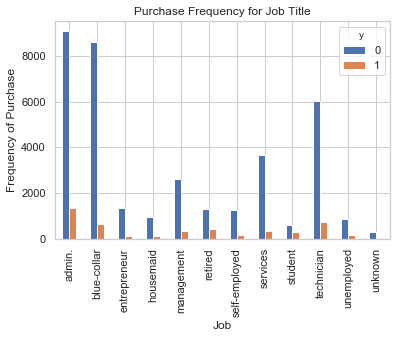

In [24]:
%matplotlib inline
pd.crosstab(df.job,df.y).plot(kind='bar')

plt.title('Purchase Frequency for Job Title')
plt.xlabel('Job')
plt.ylabel('Frequency of Purchase')
plt.savefig('purchase_fre_job')

__The frequency of purchase of the deposit depends a great deal on the job title.__   
Thus, the job title can be a good predictor of the outcome variable.

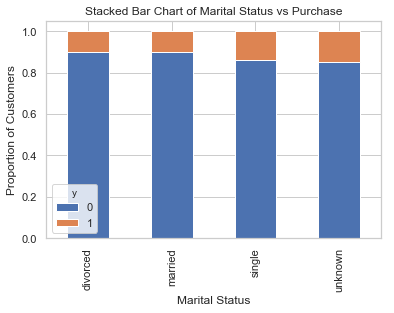

In [25]:
table=pd.crosstab(df.marital,df.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Marital Status vs Purchase')
plt.xlabel('Marital Status')
plt.ylabel('Proportion of Customers')
plt.savefig('mariral_vs_pur_stack')

__The marital status does not seem a strong predictor for the outcome variable.__

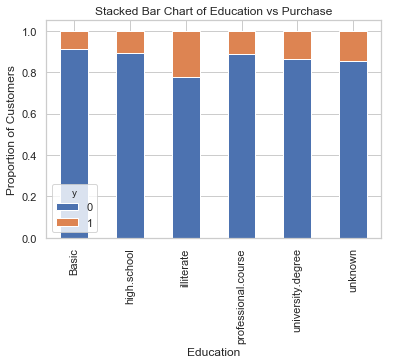

In [26]:
table=pd.crosstab(df.education,df.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Education vs Purchase')
plt.xlabel('Education')
plt.ylabel('Proportion of Customers')
plt.savefig('edu_vs_pur_stack')

__Education seems a good predictor of the outcome variable.__

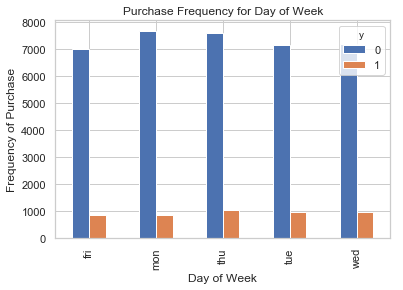

In [27]:
pd.crosstab(df.day_of_week,df.y).plot(kind='bar')
plt.title('Purchase Frequency for Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Frequency of Purchase')
plt.savefig('pur_dayofweek_bar')

__Day of week may not be a good predictor of the outcome.__

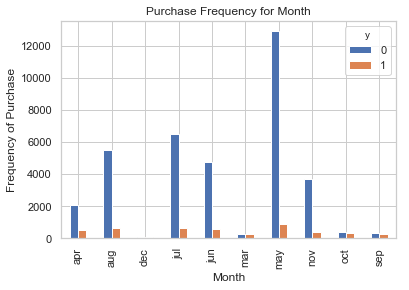

In [28]:
pd.crosstab(df.month,df.y).plot(kind='bar')
plt.title('Purchase Frequency for Month')
plt.xlabel('Month')
plt.ylabel('Frequency of Purchase')
plt.savefig('pur_fre_month_bar')

__Month might be a good predictor of the outcome variable.__

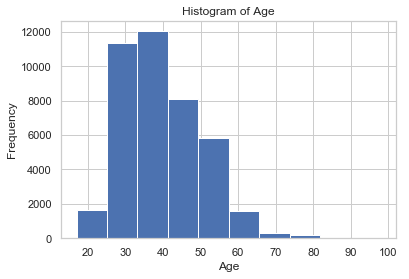

In [29]:
df.age.hist()
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('hist_age')

__Most of the customers of the bank in this dataset are in the age range of 30–40.__z


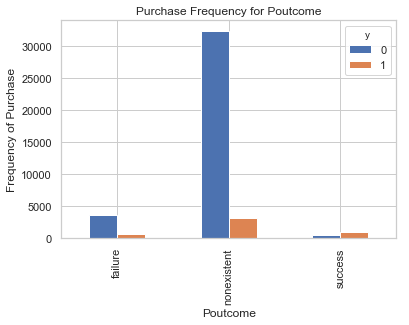

In [30]:
pd.crosstab(df.poutcome,df.y).plot(kind='bar')
plt.title('Purchase Frequency for Poutcome')
plt.xlabel('Poutcome')
plt.ylabel('Frequency of Purchase')
plt.savefig('pur_fre_pout_bar')

__Poutcome seems to be a good predictor of the outcome variable.__


--------------------------

### Create dummy variables
That is variables with only two values, zero and one.

In [31]:
 pd.get_dummies(df['job'], prefix='job').head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0


In [32]:
cat_vars=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
df_cat=df.copy()
for var in cat_vars:
    #print(var)
    cat_list='var'+'_'+var
    #print(cat_list)
    cat_list = pd.get_dummies(df[var], prefix=var)
    #print(cat_list)
    df_cat=df_cat.join(cat_list)


In [33]:
df_cat.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_Basic,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,44,blue-collar,married,Basic,unknown,yes,no,cellular,aug,thu,210,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,138,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,339,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,185,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
4,55,retired,married,Basic,no,yes,no,cellular,aug,fri,137,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1


In [34]:
#cat_vars=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
data_vars=df_cat.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

In [35]:
to_keep

['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp_var_rate',
 'cons_price_idx',
 'cons_conf_idx',
 'euribor3m',
 'nr_employed',
 'y',
 'job_admin.',
 'job_blue-collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_retired',
 'job_self-employed',
 'job_services',
 'job_student',
 'job_technician',
 'job_unemployed',
 'job_unknown',
 'marital_divorced',
 'marital_married',
 'marital_single',
 'marital_unknown',
 'education_Basic',
 'education_high.school',
 'education_illiterate',
 'education_professional.course',
 'education_university.degree',
 'education_unknown',
 'default_no',
 'default_unknown',
 'default_yes',
 'housing_no',
 'housing_unknown',
 'housing_yes',
 'loan_no',
 'loan_unknown',
 'loan_yes',
 'contact_cellular',
 'contact_telephone',
 'month_apr',
 'month_aug',
 'month_dec',
 'month_jul',
 'month_jun',
 'month_mar',
 'month_may',
 'month_nov',
 'month_oct',
 'month_sep',
 'day_of_week_fri',
 'day_of_week_mon',
 'day_of_week_thu',
 'day_of_

In [36]:
df_model=df_cat[to_keep]
df_model.columns.values

array(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_Basic', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_no',
       'default_unknown', 'default_yes', 'housing_no', 'housing_unknown',
       'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug',
       'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri',

In [37]:
df_model.sample(4)

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_Basic,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
7660,38,114,4,999,0,-1.8,92.893,-46.2,1.244,5099.1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
7253,32,136,1,999,0,1.4,93.444,-36.1,4.964,5228.1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
23131,64,354,1,999,0,-3.0,92.713,-33.0,0.715,5023.5,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
2861,40,777,2,999,0,-1.8,92.893,-46.2,1.281,5099.1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0


In [38]:
df_model.shape

(41188, 62)

----------------

In [39]:
import sklearn
print('sklearn: %s' % sklearn.__version__)

sklearn: 0.22


In [40]:
from sklearn.model_selection import train_test_split
X = df_model.loc[:, df_model.columns != 'y'].copy()
y = df_model.loc[:, df_model.columns == 'y'].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [41]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='liblinear')
logreg.fit(X_train, y_train.values.ravel())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [67]:
logreg.coef_

array([[ 4.91488803e-03,  4.46402301e-03,  1.68458853e-02,
        -1.55127092e-03, -5.16335331e-02, -2.02980163e-01,
         3.35179125e-01,  3.66088024e-02, -2.22893643e-01,
        -6.18453046e-03,  5.36396748e-02, -9.40133389e-02,
        -8.55756657e-03, -3.95920865e-03,  3.27663653e-03,
         3.69522865e-02, -5.96461861e-03, -1.92854076e-02,
         2.89539316e-02,  3.34931707e-03,  6.89998271e-03,
         1.78973126e-03,  5.78390948e-04, -6.22473156e-02,
         6.50160051e-02, -2.65660268e-04, -8.07503876e-02,
        -2.91345406e-03,  1.01113695e-03,  5.55902272e-03,
         7.36990922e-02,  6.47601002e-03,  8.27008394e-02,
        -7.96054368e-02, -1.39824380e-05,  5.20886698e-03,
        -1.00037354e-03, -1.12707324e-03,  1.20817789e-02,
        -1.00037354e-03, -7.99998521e-03,  9.28828042e-02,
        -8.98013840e-02,  1.95156330e-02,  3.45823499e-02,
        -1.70324108e-03,  5.67094864e-02,  5.57508976e-02,
         6.27813914e-02, -2.37857774e-01, -1.49787973e-0

In [75]:
logreg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [66]:
Model_1_Accuracy=logreg.score(X_test, y_test)
#Model_1_Accuracy
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(Model_1_Accuracy))

Accuracy of logistic regression classifier on test set: 0.91


--------------

## Confusion Matrix == Accuracy

In [188]:
from sklearn.metrics import confusion_matrix
y_pred = logreg.predict(X_test)
confusion_mat = confusion_matrix(y_test, y_pred)
print(confusion_mat)

[[10718   263]
 [  811   565]]


__Accuracy: % of correct prediction wrt all predictions__  
(10718+565 correct predictions and 811+263 incorrect predictions in the example)  
__Precision: Koliko od onoga sta sam ja stavio da je 0 je stvarno 0?__   
(100 sam stavio da su 0, a 90 je stvarno jer 10 su 1 koje sam krivo rekao da su 0) --> 90%  
__Recall: Koliki % od stvarnih 0 sam dobro stavio da su 0?__   
(poslao sam 100 0, a stavio sam 80 da su 0) --> 80%  
__F-beta score is weighted harmonic mean of the precision and recall, where an F-beta weights the recall more than the precision by a factor of beta. The score reaches its best value at 1 and worst score at 0.__ 


In [59]:
(confusion_matrix[0][0]+confusion_matrix[1][1])/confusion_matrix.sum()

0.9130857004127215

## classification_report

In [61]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95     10981
           1       0.68      0.41      0.51      1376

    accuracy                           0.91     12357
   macro avg       0.81      0.69      0.73     12357
weighted avg       0.90      0.91      0.90     12357



__The precision is the ratio tp / (tp + fp)__ where tp is the number of true positives and fp the number of false positives.   
0=> 10718/(10718+811)=>10718/11529=0.929  
1=> 565/(565+263)=>565/828=0.682

__The precision is intuitively the ability of the classifier to not label a sample as positive if it is negative.__ 


__Koliko od onoga sta sam ja stavio da je 0 je stvarno 0?__



In [62]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95     10981
           1       0.68      0.41      0.51      1376

    accuracy                           0.91     12357
   macro avg       0.81      0.69      0.73     12357
weighted avg       0.90      0.91      0.90     12357



__The recall is the ratio tp / (tp + fn)__  where tp is the number of true positives and fn the number of false negatives.  
__The recall is intuitively the ability of the classifier to find all the positive samples.__  

__The F-beta score can be interpreted as a weighted harmonic mean of the precision and recall, where an F-beta score reaches its best value at 1 and worst score at 0.__  
__The F-beta score weights the recall more than the precision by a factor of beta.__  
beta = 1.0 means recall and precision are equally important.

## ROC Curve --> receiver operating characteristic (ROC)
https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5

In [126]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])


Predict will give either 0 or 1 as output  
Predict_proba will give the only probability of 1.  
https://discuss.analyticsvidhya.com/t/what-is-the-difference-between-predict-and-predict-proba/67376

In [119]:
fpr, tpr, thresholds

(array([0.00000000e+00, 9.10663874e-05, 1.82132775e-04, ...,
        8.77606775e-01, 8.77606775e-01, 1.00000000e+00]),
 array([0.        , 0.        , 0.        , ..., 0.99927326, 1.        ,
        1.        ]),
 array([1.99999972, 0.99999972, 0.99995684, ..., 0.01120703, 0.011207  ,
        0.00492507]))

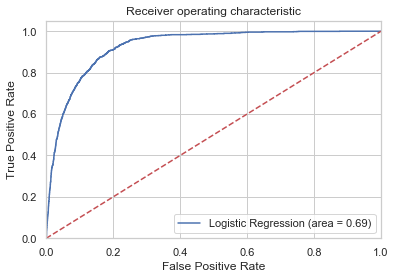

In [120]:
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
#plt.show()

The dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner).  

## Statistic on the model

In [121]:
import statsmodels.api as sm
logit_model=sm.Logit(y_train,X_train)

In [123]:
X_train.shape

(28831, 61)

In [125]:
result=logit_model.fit(maxiter=30)
print(result.summary2())

         Current function value: 0.209557
         Iterations: 30
                                        Results: Logit
Model:                         Logit                     Pseudo R-squared:          0.407     
Dependent Variable:            y                         AIC:                       12185.4599
Date:                          2019-12-26 11:52          BIC:                       12607.1895
No. Observations:              28831                     Log-Likelihood:            -6041.7   
Df Model:                      50                        LL-Null:                   -10182.   
Df Residuals:                  28780                     LLR p-value:               0.0000    
Converged:                     0.0000                    Scale:                     1.0000    
No. Iterations:                30.0000                                                        
----------------------------------------------------------------------------------------------
                        

/Users/igor.arambasic/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Looks like our model is really bad!!!  
WE did NOT use Feature Selection...  

https://machinelearningmastery.com/feature-selection-in-python-with-scikit-learn/

In [145]:
from sklearn.feature_selection import RFE
#Feature ranking with recursive feature elimination.
rfe = RFE(logreg, 25)

In [146]:
#logreg.fit(X_train, y_train.values.ravel())
rfe_fit = rfe.fit(X_train, y_train.values.ravel())


In [151]:
type(rfe_fit)

sklearn.feature_selection._rfe.RFE

In [147]:
rfe_fit.n_features_

25

In [150]:
#the ones with position 1 are the top N features where N is the desired number of features put in RFE parameter
rfe_fit.ranking_

array([22, 26,  8, 29,  1, 12, 10, 13,  1, 18,  1,  1,  1,  5, 27,  1,  9,
        4,  1, 28,  1, 21, 34, 15, 14, 35,  1, 24, 31, 19, 17,  1,  1,  1,
       37,  3, 32, 30, 20, 33, 23,  7,  1,  1,  1,  1, 11,  6,  1,  1,  1,
        1, 25,  2,  1, 36, 16,  1,  1,  1,  1])

In [157]:
#All top N features are True
rfe_fit.support_


array([False, False, False, False,  True, False, False, False,  True,
       False,  True,  True,  True, False, False,  True, False, False,
        True, False,  True, False, False, False, False, False,  True,
       False, False, False, False,  True,  True,  True, False, False,
       False, False, False, False, False, False,  True,  True,  True,
        True, False, False,  True,  True,  True,  True, False, False,
        True, False, False,  True,  True,  True,  True])

In [175]:
cols=X_train.columns[rfe.support_]
X_train_25=X_train[cols]


In [177]:
logreg_25 = LogisticRegression(solver='liblinear')
logreg_25.fit(X_train_25, y_train.values.ravel())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [191]:
y_pred_25 = logreg_25.predict(X_test[cols])
confusion_mat_25 = confusion_matrix(y_test, y_pred_25)
print(confusion_mat_25)

[[10864   117]
 [ 1099   277]]


In [192]:
print(classification_report(y_test, y_pred_25))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95     10981
           1       0.70      0.20      0.31      1376

    accuracy                           0.90     12357
   macro avg       0.81      0.60      0.63     12357
weighted avg       0.89      0.90      0.88     12357



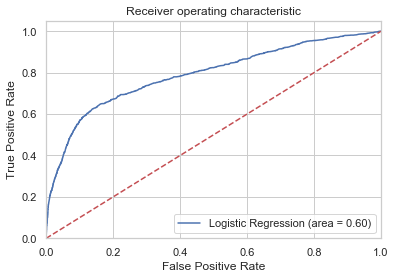

In [195]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg_25.predict(X_test[cols]))
fpr, tpr, thresholds = roc_curve(y_test, logreg_25.predict_proba(X_test[cols])[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
#plt.show()

In [198]:
import statsmodels.api as sm
logit_model=sm.Logit(y_train,X_train[cols])
result=logit_model.fit(maxiter=30)
print(result.summary2())

         Current function value: 0.282982
         Iterations: 30
                               Results: Logit
Model:                   Logit               Pseudo R-squared:    0.199     
Dependent Variable:      y                   AIC:                 16367.3009
Date:                    2019-12-26 12:32    BIC:                 16574.0311
No. Observations:        28831               Log-Likelihood:      -8158.7   
Df Model:                24                  LL-Null:             -10182.   
Df Residuals:            28806               LLR p-value:         0.0000    
Converged:               0.0000              Scale:               1.0000    
No. Iterations:          30.0000                                            
----------------------------------------------------------------------------
                      Coef.    Std.Err.    z     P>|z|    [0.025     0.975] 
----------------------------------------------------------------------------
previous               0.1842    0.0618  

/Users/igor.arambasic/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [199]:
result.pvalues[result.pvalues>0.05]

job_blue-collar         0.188719
job_entrepreneur        0.521694
job_unemployed          0.414027
education_Basic         0.148288
education_unknown       0.319268
default_no              0.995251
default_unknown         0.995359
month_dec               0.516919
month_oct               0.125763
poutcome_failure        0.994964
poutcome_nonexistent    0.995188
poutcome_success        0.995645
dtype: float64

In [200]:
result.pvalues[result.pvalues<0.05]

previous              2.861980e-03
euribor3m            1.872251e-213
job_admin.            1.865756e-02
job_retired           1.134140e-07
job_student           2.361947e-05
contact_telephone     1.377004e-03
month_apr             1.186536e-10
month_aug             4.119230e-06
month_mar             1.862836e-05
month_may             7.468480e-75
month_nov             6.307413e-07
day_of_week_mon       2.322319e-05
day_of_week_wed       9.081563e-03
dtype: float64

In [204]:
X_train_13=X_train[result.pvalues[result.pvalues<0.05].index]

In [207]:
cols=result.pvalues[result.pvalues<0.05].index
logreg_13 = LogisticRegression(solver='liblinear')
logreg_13.fit(X_train_13, y_train.values.ravel())
y_pred_13 = logreg_13.predict(X_test[cols])
confusion_mat_13 = confusion_matrix(y_test, y_pred_13)
print(confusion_mat_13)

[[10874   107]
 [ 1231   145]]


In [209]:
print(classification_report(y_test, y_pred_13))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94     10981
           1       0.58      0.11      0.18      1376

    accuracy                           0.89     12357
   macro avg       0.74      0.55      0.56     12357
weighted avg       0.86      0.89      0.86     12357



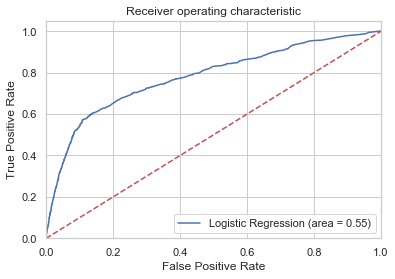

In [211]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg_13.predict(X_test[cols]))
fpr, tpr, thresholds = roc_curve(y_test, logreg_13.predict_proba(X_test[cols])[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
#plt.show()